In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cell 1: Markdown
from IPython.display import Markdown
Markdown(r'''
# 📚 Signals & Systems – Convolution operation analysis, System response to various Signals, Simulate systems with difference equations
#     EE 200- Signal & Systems, IIT Kanpur
#     Instructor - Prof. Tushar Sandhan
---
''')



# 📚 Signals & Systems – Convolution operation analysis, System response to various Signals, Simulate systems with difference equations
#     EE 200- Signal & Systems, IIT Kanpur
#     Instructor - Prof. Tushar Sandhan
---


 **Question 1:** Compute and plot the convolution of
x(t)=u(t)−u(t−2),h(t)=e
−t
 u(t)
and verify analytically.

**Core Concept** - This is an LTI system where the output is:
y(t)=x(t)∗h(t)
A rectangular pulse convolved with an exponential gives a smeared exponential rise and decay.



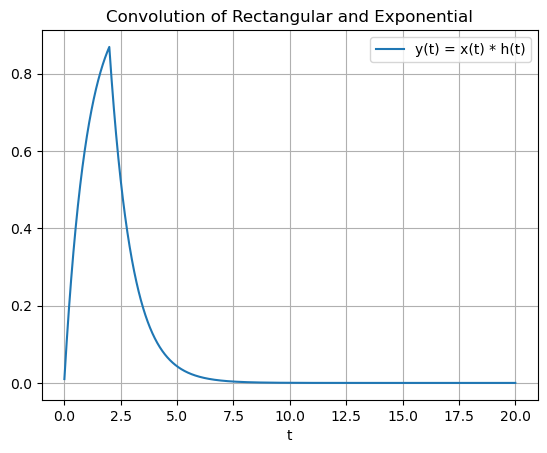

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

x = np.heaviside(t, 1) - np.heaviside(t - 2, 1)  # pulse of width 2
h = np.exp(-t)

y = convolve(x, h) * dt
t_conv = np.linspace(0, 2 * t[-1], len(y))

plt.plot(t_conv, y, label='y(t) = x(t) * h(t)')
plt.title('Convolution of Rectangular and Exponential')
plt.xlabel('t'); plt.grid(); plt.legend()
plt.show()


** Question 2**: Given system impulse response

h(t)=e
−2t
 u(t)
, Find and plot the output for input:
$x(t)=cos(5t)u(t)$


***Core Concept*** - The convolution of an exponential and sinusoidal produces a damped sinusoid (resonance if frequency aligns).


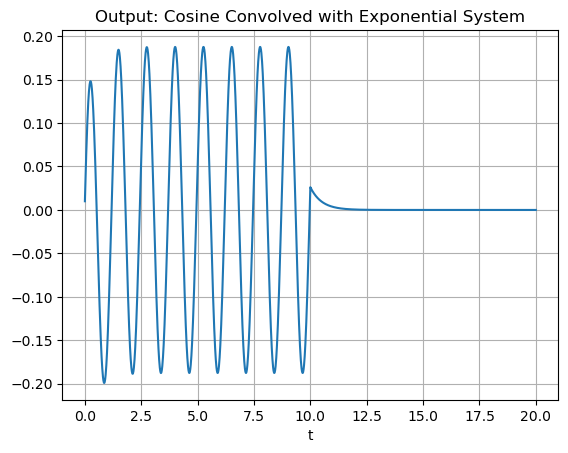

In [4]:
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

x = np.cos(5 * t)
h = np.exp(-2 * t)

y = convolve(x, h) * dt
t_conv = np.linspace(0, 2*t[-1], len(y))

plt.plot(t_conv, y)
plt.title('Output: Cosine Convolved with Exponential System')
plt.xlabel('t'); plt.grid()
plt.show()


** Question 3 **- Solve the discrete system:


y[n]=0.8y[n−1]+x[n]
with
x[n]=δ[n] (unit impulse) and
y[0]=0

**Core concept - ** This is an IIR system. Impulse response is exponentially decaying:
y[n]=0.8^n

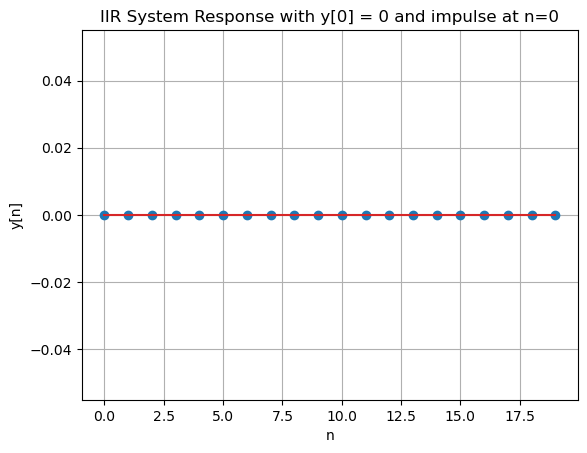

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
x = np.zeros(N)
x[0] = 1  # impulse

y = np.zeros(N)
y[0] = 0  # given initial condition

for n in range(1, N):
    y[n] = 0.8 * y[n-1] + x[n]

plt.stem(np.arange(N), y)
plt.title('IIR System Response with y[0] = 0 and impulse at n=0')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
plt.show()


Given two discrete-time signals:

Input signal:


x[n]=[1,2,3]
Impulse response of the system:


h[n]=[0,1,0.5]
Perform the linear convolution of

x[n] and

h[n] to compute the output signal

y[n]=x[n]∗h[n].




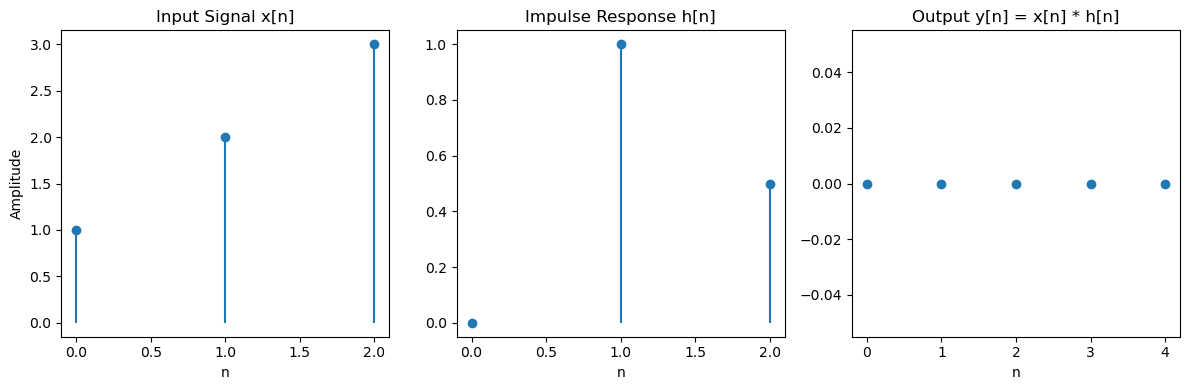

In [6]:
import matplotlib.pyplot as plt

def convolve_signals(x, h):
    """
    Manually compute the discrete convolution of two signals x and h.

    Parameters:
    x (list or array): Input signal
    h (list or array): Impulse response

    Returns:
    y (list): Convolution output signal y = x * h
    """
    len_x = len(x)               # Length of input signal x
    len_h = len(h)               # Length of impulse response h
    y_length = len_x + len_h - 1 # Length of output convolution signal

    y = [0.0] * y_length         # Initialize output list with zeros

    # Compute convolution sum for each output sample y[n]
    ###############################################################
    # Write answer here




   ###############################################################
    return y

# Define input discrete-time signals
x = [1, 2, 3]    # Example input signal x[n]
h = [0, 1, 0.5]  # Example impulse response h[n]

# Compute convolution y[n] = x[n] * h[n]
y = convolve_signals(x, h)

# Create time indices for plotting discrete signals
n_x = list(range(len(x)))     # Indices for input signal x
n_h = list(range(len(h)))     # Indices for impulse response h
n_y = list(range(len(y)))     # Indices for convolution output y

# Plot input, impulse response, and output signals side-by-side
plt.figure(figsize=(12, 4))  # Set figure size

# Plot input signal x[n]
plt.subplot(1, 3, 1)
plt.stem(n_x, x, basefmt=" ")   # Stem plot for discrete signal
plt.title("Input Signal x[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")

# Plot impulse response h[n]
plt.subplot(1, 3, 2)
plt.stem(n_h, h, basefmt=" ")
plt.title("Impulse Response h[n]")
plt.xlabel("n")

# Plot convolution output y[n]
plt.subplot(1, 3, 3)
plt.stem(n_y, y, basefmt=" ")
plt.title("Output y[n] = x[n] * h[n]")
plt.xlabel("n")

plt.tight_layout()  # Adjust subplot spacing for clarity
plt.show()          # Display all plots
